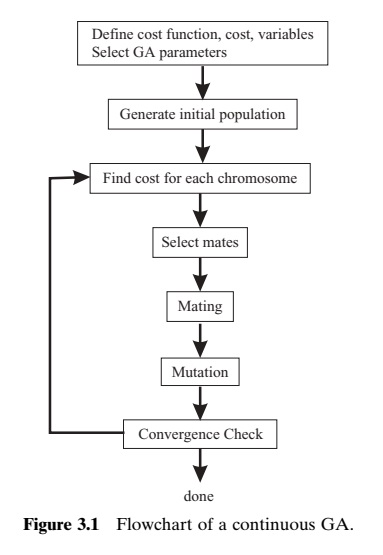

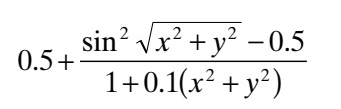

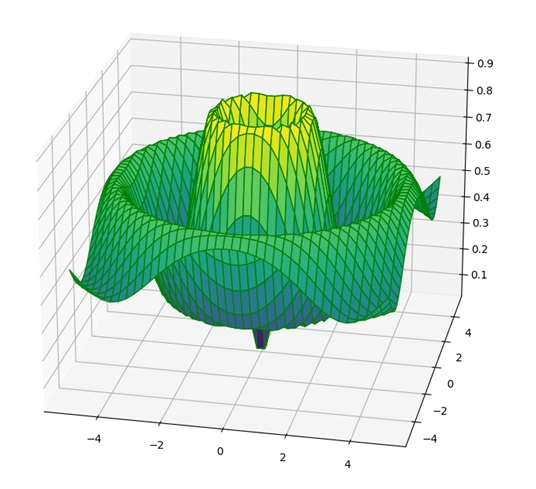

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fitness_function(pop2):
    x1 = pop2[:, 0]
    x2 = pop2[:, 1]
    var1 = (x1**2) + (x2**2)
    var2 = np.sin(np.sqrt(var1))
    var3 = var2**2
    var4 = (var3 - 0.5) / (1.0 + (0.1*var1))
    zz = -1.0 * (0.5 + var4)
    # para achar o minimo tem que multiplicar por -1.0
    # Lembrar que o AG aqui está escrito para achar o maximo de uma função
    return zz
# end def


In [ ]:
#
# Dados de Entrada # Dados de Entrada # Dados de Entrada
# Dados de Entrada # Dados de Entrada # Dados de Entrada
# Dados de Entrada # Dados de Entrada # Dados de Entrada
#
individual_size = 2

individ_max_value = 5.0
individ_min_value = -5.0

population_size = 100

select_mates_size = 25
# A primeira coisa é o seguinte: nós estamos querendo manter metade
# da população de uma geração para a próxima geração. Ou seja, a metade
# dos melhores individuos de uma determinada geração passa para
# a geração seguinte. A outra metade da população vai ser criada
# com os casamentos. Cada casamento precisa de um Pai_1 e um Pai_2. E cada
# casamento gera dois filhos. Então no nosso caso o "select_mates_size" sempre
# vai ser igual a "population_size" / 4.

num_generations = 60

mutation_rate = 0.3 # 20% de chance de um cromossomo sofrer mutação
# We chose a mutation rate of 20%
desv_padrao_da_mutacao = 0.125 # 5% do valor do X ou do Y ao qual está sendo aplicado
# Must be non-negative.

#
# Generate Initial Population # Generate Initial Population
# Generate Initial Population # Generate Initial Population
# Generate Initial Population # Generate Initial Population
#
tuple_1 = (population_size,individual_size)
rng = np.random.default_rng()
population = rng.uniform(individ_min_value,individ_max_value,tuple_1)
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform


In [ ]:
best_value_fitness_function = np.zeros(num_generations)

cont_gera = 0
for cont_generation in range(num_generations):

    cont_gera = cont_gera + 1
    if cont_gera> 100:
        print('cont_generation = ', cont_generation)
        cont_gera = 0
    #end if

    #
    # Find cost (or fitness) for each Individual
    #
    original_vet_fitness_value = fitness_function(population)

    #
    # Select Mates # Select Mates # Select Mates
    # Select Mates # Select Mates # Select Mates
    # Select Mates # Select Mates # Select Mates
    #

    # obs-1: Our Genetic Algorithm is to find the variable values that
    # maximize our fitness function
    #

    min_fitness = np.min(original_vet_fitness_value)

    if min_fitness < 0.0:
        vet_fitness_value = (-1.0 * min_fitness) + original_vet_fitness_value
    # end if

    selection_probs = vet_fitness_value / np.sum(vet_fitness_value)

    # Agora vamos ordenar o "selection_prob" para que os maiores valores de fitness
    # fiquem nos primeiros lugares do array "selection_probs". Por causa
    # dessa ordenação é que o nosso Algoritmo Genético é para calcular o valor das
    # variáveis independentes que maximizam a função objetivo (a turma que trabalha
    # com Algoritmo Genético chama de Função Fitness).

    #
    # fazendo o meu próprio "sort" na ordem decrescente
    #

    index_select_probs = np.zeros(population_size, dtype='int64')
    selection_probs_2 = np.zeros(population_size)
    for k in range(population_size):
        var2 = np.max(selection_probs)
        for j in range(population_size):
            if var2 == selection_probs[j]:
                index_select_probs[k] = j
                selection_probs_2[k] = var2
            # end if
        # end for
        selection_probs[index_select_probs[k]] = -1.0
    # end for

    #
    # Agora eu tenho:
    #     1) index_select_probs
    #     2) selection_probs_2
    #

    selected_indices = np.zeros((select_mates_size,2), dtype='int64')

    rng2 = np.random.default_rng()
    var1 = rng2.random(select_mates_size)
    #Generate one random float uniformly distributed over the range [0, 1)
    for h in range(select_mates_size):
        acumulando = 0.0
        for k in range(population_size):
            acumulando = selection_probs_2[k] + acumulando
            if (var1[h] <= acumulando):
                selected_indices[h,0] = index_select_probs[k]
                break
            # end if
        # end for
    # end for

    rng3 = np.random.default_rng()
    var3 = rng2.random(select_mates_size)
    #Generate one random float uniformly distributed over the range [0, 1)
    for h in range(select_mates_size):
        acumulando = 0.0
        for k in range(population_size):
            acumulando = selection_probs_2[k] + acumulando
            if (var3[h] <= acumulando):
                selected_indices[h,1] = index_select_probs[k]
                break
            # end if
        # end for
    # end for

    #
    # Crossover # Crossover # Crossover
    # Crossover # Crossover # Crossover
    # Crossover # Crossover # Crossover
    #

    tam1 = int(population_size/2)
    matriz_filhos = np.zeros((tam1,individual_size))

    cc1 = 0
    for hh in range(select_mates_size):
        ff2 = selected_indices[hh,0]
        vet_x1 = population[ff2,:]
        #
        ff2 = selected_indices[hh,1]
        vet_x2 = population[ff2,:]
        #
        beta = np.random.rand()
        filho1 = (beta * vet_x1) + ((1-beta) * vet_x2)
        filho2 = ((1-beta) * vet_x1) + (beta * vet_x2)
        #
        matriz_filhos[cc1,:] = filho1
        matriz_filhos[cc1+1,:] = filho2
        #end for
        cc1 = cc1 + 2
    #end for hh in range((tamanho**2)/4):

    # This method does not allow offspring variables outside the
    # bounds set by the parent unless b > 1

    #
    # Mutation # Mutation # Mutation
    # Mutation # Mutation # Mutation
    # Mutation # Mutation # Mutation
    #

    for pp2 in range(tam1):
        for pp3 in range(individual_size):
            random4 = np.random.rand()
            if random4 <= mutation_rate:
                scale1 = np.abs(desv_padrao_da_mutacao * matriz_filhos[pp2,pp3])
                var77 = np.random.normal(loc=0.0, scale=scale1, size=None)
                matriz_filhos[pp2,pp3] = matriz_filhos[pp2,pp3] + var77
            #end if
        #end for
    #end for

    #
    # Pegar a "matriz_filhos" e jogar dentro da matriz "population".
    # Garantindo que nós vamos manter metade
    # da população de uma geração para a próxima geração. Ou seja, a metade
    # dos melhores individuos de uma determinada geração passa para
    # a geração seguinte. A outra metade da população foi criada
    # com os casamentos. Cada casamento gera dois filhos.
    #
    #

    next_population = np.zeros(tuple_1)

    kv = 0
    for nn2 in range(population_size):
        if nn2 < int(population_size/2):
            kl = index_select_probs[nn2]
            next_population[nn2,:] = population[kl,:]
        else:
            next_population[nn2,:] = matriz_filhos[kv,:]
            kv = kv + 1
        # end if
    #end for

    population = next_population

    index_of_best_member = index_select_probs[0]
    best_value_fitness_function[cont_generation] = original_vet_fitness_value[index_of_best_member]
    best_member_of_population = population[0,:]

# end for cont_generation in range(num_generations):



best_value_fitness_function =  0.0

best_member_of_population =  [-1.36800214e-09 -1.80676136e-09]



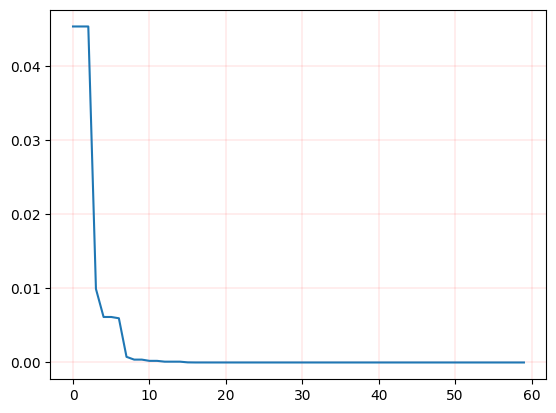

In [ ]:
print()
print('best_value_fitness_function = ', -1.0 * best_value_fitness_function[-1])

print()
print('best_member_of_population = ', best_member_of_population)
print()

plot1 =  -1.0 * best_value_fitness_function
plt.plot(plot1)
plt.grid(color='r', linestyle='-', linewidth=0.1)
plt.show()